In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
data=pd.read_csv(r"C:\Users\Admin\Downloads\Cognifyz Technologies\Dataset .csv")

In [43]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [49]:
data.shape

(9551, 21)

## Task 1.1 Determine the top three mostcommon cuisines in the dataset.

In [56]:
cuisine_count=data['Cuisines'].str.split(',',).explode().value_counts()

top_three_cuisine=cuisine_count.head(3)
print(top_three_cuisine)

Cuisines
North Indian    2992
 Chinese        1880
 Fast Food      1314
Name: count, dtype: int64


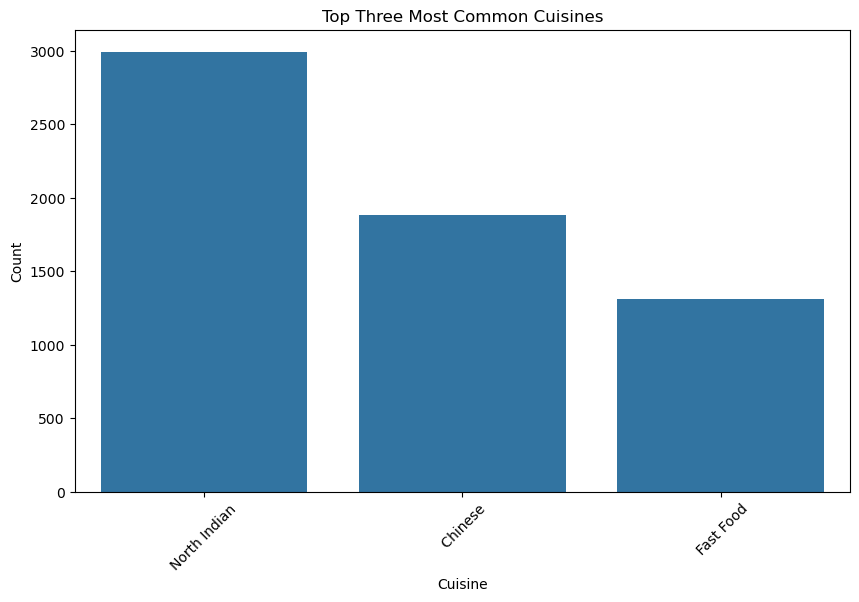

In [58]:
top_three_cuisine=top_three_cuisine.sort_values(ascending=False)

fig,Ax=plt.subplots(figsize=(10,6))
sns.barplot(x=top_three_cuisine.index,y=top_three_cuisine.values,ax=Ax)
plt.title('Top Three Most Common Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Task 1.2 Calculate the percentage of restaurants that serve each of the top cuisines.

In [63]:
top_restaurents=len(data)
percentage_per_cuisine=(top_three_cuisine/top_restaurents)*100
print(percentage_per_cuisine)

Cuisines
North Indian    31.326563
 Chinese        19.683803
 Fast Food      13.757722
Name: count, dtype: float64


In [65]:
print( 'percentage of restaurants for top three cusines')
percentage_per_cuisine

percentage of restaurants for top three cusines


Cuisines
North Indian    31.326563
 Chinese        19.683803
 Fast Food      13.757722
Name: count, dtype: float64

Text(0.5, 1.0, 'Percentage of Restaurants Serving Top Three Cuisines')

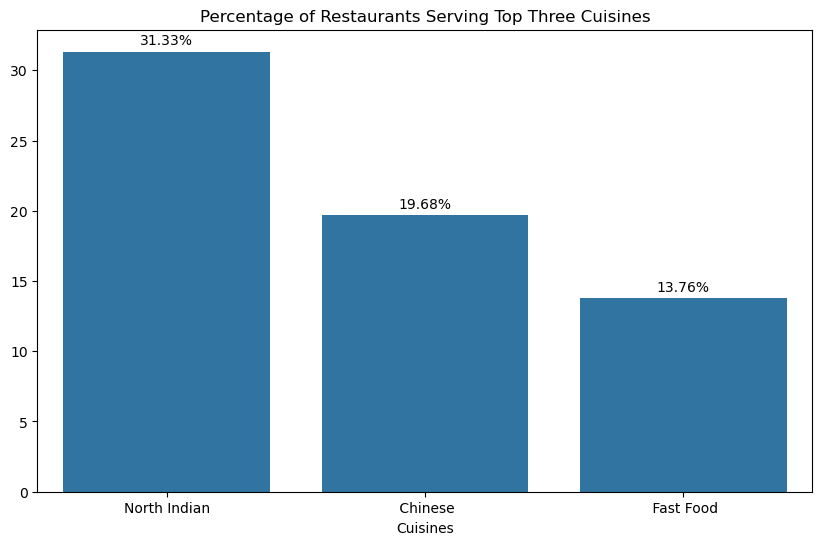

In [67]:
fig,ax=plt.subplots(figsize=(10,6))
ab=sns.barplot(x=percentage_per_cuisine.index,y=percentage_per_cuisine.values)
for bar in ab.containers[0]:
  height=bar.get_height()
  ab.annotate(f'{height:.2f}%',xy=(bar.get_x()+bar.get_width()/2,height),xytext=(0,3),textcoords='offset points',ha='center',va='bottom')
plt.title('Percentage of Restaurants Serving Top Three Cuisines')

## Level 1 Task-2  City Analysis

## Identify the city with the highest number of restaurants in the dataset.

In [77]:
data['City'].value_counts()

City
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: count, Length: 141, dtype: int64

In [81]:
#highest number in the dataset
city=data['City'].value_counts()
city.index[0]

'New Delhi'

## Calculate the average rating for restaurants in each city.

In [93]:
mean=data['Aggregate rating'].mean()
mean

2.66637001361114

In [95]:
average_ratings = data.groupby(['City','Restaurant Name'])['Aggregate rating'].mean().reset_index()
average_ratings

,City,Restaurant Name,Aggregate rating
0,Abu Dhabi,Applebee's,4.0
1,Abu Dhabi,Bait El Khetyar,4.0
2,Abu Dhabi,Cho Gao - Crowne Plaza Abu Dhabi,4.4
3,Abu Dhabi,Denny's,4.6
4,Abu Dhabi,Famous Dave's Barbecue,4.6
...,...,...,...
7969,��stanbul,Leman K�_lt�_r,3.7
7970,��stanbul,Naml۱ Gurme,4.1
7971,��stanbul,Starbucks,4.9
7972,��stanbul,Valonia,4.2


In [97]:
average_ratings = data.groupby('City')['Aggregate rating'].mean().reset_index()
average_ratings

,City,Aggregate rating
0,Abu Dhabi,4.300000
1,Agra,3.965000
2,Ahmedabad,4.161905
3,Albany,3.555000
4,Allahabad,3.395000
...,...,...
136,Weirton,3.900000
137,Wellington City,4.250000
138,Winchester Bay,3.200000
139,Yorkton,3.300000


## Determine the city with the highest average rating.

In [100]:
average_ratings= data.groupby('City')['Aggregate rating'].mean().reset_index()
average_ratings_city=average_ratings.sort_values(by='Aggregate rating',ascending=False)
average_ratings_city

,City,Aggregate rating
56,Inner City,4.900000
107,Quezon City,4.800000
73,Makati City,4.650000
95,Pasig City,4.633333
75,Mandaluyong City,4.625000
...,...,...
88,New Delhi,2.438845
83,Montville,2.400000
78,Mc Millan,2.400000
89,Noida,2.036204


In [102]:
average_ratings_city.iloc[0,0]

'Inner City'

## Level 1 Task-3  Price Range Distribution

## Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.

In [106]:
data['Price range'].value_counts()

Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

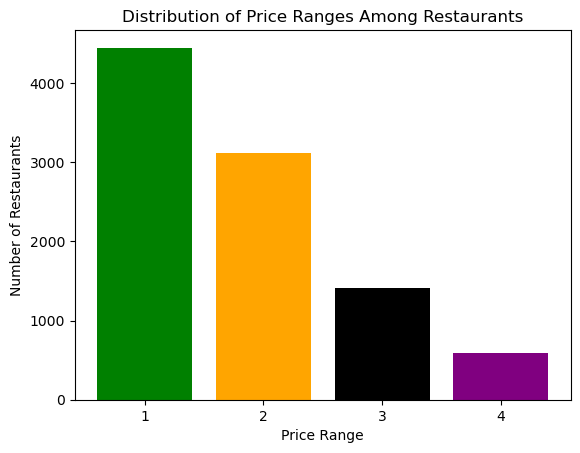

In [110]:
price_counts = data['Price range'].value_counts()
plt.bar(['1','2','3','4'], list(price_counts.values), color=['green', 'orange', 'black','purple'])
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Price Ranges Among Restaurants')
plt.show()

## Calculate the percentage of restaurants in each price range category.

In [115]:
total=len(data)
total

9551

In [117]:
count=data['Price range'].value_counts().values
count

array([4444, 3113, 1408,  586], dtype=int64)

In [119]:
percentage=round(data['Price range'].value_counts()/total*100,2)
percentage

Price range
1    46.53
2    32.59
3    14.74
4     6.14
Name: count, dtype: float64

In [123]:
df=pd.DataFrame({'Price range':data['Price range'].value_counts().index,
                 'Count':count,
                 'Percentage':percentage})
df

,Price range,Count,Percentage
Price range,,,
1,1,4444,46.53
2,2,3113,32.59
3,3,1408,14.74
4,4,586,6.14


## Level 1 Task-4 Determine the percentage of restaurants that offer online delivery.

In [126]:
data[data['Has Online delivery']=='Yes']['Restaurant Name'].value_counts()

Restaurant Name
Subway                47
McDonald's            30
Pizza Hut Delivery    18
Chaayos               15
KFC                   15
                      ..
Al Zaitoon             1
The Barley House       1
Bemisaal               1
Urban Kabab            1
Saffron Mantra         1
Name: count, Length: 1728, dtype: int64

In [128]:
leng=len(data[data['Has Online delivery']=='Yes'])
leng

2451

In [130]:
round(data[data['Has Online delivery']=='Yes']['Restaurant Name'].value_counts()/leng*100,2)

Restaurant Name
Subway                1.92
McDonald's            1.22
Pizza Hut Delivery    0.73
Chaayos               0.61
KFC                   0.61
                      ... 
Al Zaitoon            0.04
The Barley House      0.04
Bemisaal              0.04
Urban Kabab           0.04
Saffron Mantra        0.04
Name: count, Length: 1728, dtype: float64

In [132]:
total=len(data)
total

9551

In [134]:
percentage=(leng/total)*100
percentage

25.662234321013504

## Compare the average ratings of restaurants with and without online delivery.

In [139]:
online_data=data[data['Has Online delivery']=='Yes']
offline_data=data[data['Has Online delivery']=='No']

In [141]:
average_ratings= online_data.groupby('Restaurant Name')['Aggregate rating'].mean().reset_index()
average_ratings

,Restaurant Name,Aggregate rating
0,#OFF Campus,3.70
1,#Urban Caf��,3.30
2,18 Degrees Resto Lounge,3.60
3,19 Flavours Biryani,4.10
4,2 Bros Kitchen,3.20
...,...,...
1723,Zucca Pizzeria,3.50
1724,bu��no,3.75
1725,hug!,3.50
1726,iGNiTE,3.00


In [143]:
data.groupby('Has Online delivery')['Aggregate rating'].mean().round(2).reset_index()

,Has Online delivery,Aggregate rating
0,No,2.47
1,Yes,3.25
